We want to predict the body mass of a penguin given its culmen and flipper measurements.

In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")

# we randomly shuffled the rows of the dataset after loading it
# the reason is to break a spurious order-related statistical dependency
# that would otherwise cause trouble with the naive cross-validation procedure
# we'll use in this notebook
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)

data, target = dataset[feature_names], dataset[target_name]

Evaluate the generalization performance of DecisionTreeRegressor and RandomForestRegression using a 10-fold cross-validation.

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)

cv=10
cv_results_tree = cross_validate(tree, data, target,
                                 cv=cv, return_train_score=True)

cv_results_tree["test_score"].mean(), cv_results_tree["test_score"].std()

(0.6274987889886428, 0.099704183300966)

In [3]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

cv_results_rf = cross_validate(rf, data, target, 
                               cv=cv, return_train_score=True)

cv_results_rf["test_score"].mean(), cv_results_rf["test_score"].std() 

(0.8035860871438268, 0.04467350184659844)

In [4]:
print(
    'Random forest is better than a single decision tree for '
    f'{sum(cv_results_rf["test_score"] > cv_results_tree["test_score"])} '
    'CV iterations out of 10'
) 

Random forest is better than a single decision tree for 10 CV iterations out of 10


Now train and evaluate with the same cross-validation strategy a random forest with 5 decision trees and another containing 100 decision trees.

In [5]:
rf_5 = RandomForestRegressor(n_estimators=5, random_state=0)

cv=10
cv_results_rf_5 = cross_validate(rf_5, data, target, 
                                 cv=cv, return_train_score=True)

cv_results_rf_5["test_score"].mean(), cv_results_rf_5["test_score"].std() 

(0.7668640137103877, 0.07359278138744398)

In [6]:
rf_100 = RandomForestRegressor(n_estimators=100, random_state=0)

cv=10
cv_results_rf_100 = cross_validate(rf_100, data, target, 
                                   cv=cv, return_train_score=True)

cv_results_rf_100["test_score"].mean(), cv_results_rf_100["test_score"].std() 

(0.8035860871438268, 0.04467350184659844)

In [7]:
print(
    'Random forest with 100 trees is better than a 5 trees Random Forest for '
    f'{sum(cv_results_rf_100["test_score"] > cv_results_rf_5["test_score"])} '
    'CV iterations out of 10'
) 

Random forest with 100 trees is better than a 5 trees Random Forest for 9 CV iterations out of 10


In [8]:
print(
    'Scores for random forest with 5 trees: '
    f'train: {cv_results_rf_5["train_score"].mean():.3f} +/- '
    f'{cv_results_rf_5["train_score"].std():.3f}, '
    f'test: {cv_results_rf_5["test_score"].mean():.3f} +/- '
    f'{cv_results_rf_5["test_score"].std():.3f}'
)
print(    
    'Scores for random forest with 100 trees: '
    f'train: {cv_results_rf_100["train_score"].mean():.3f} +/- '
    f'{cv_results_rf_100["train_score"].std():.3f}, '
    f'test: {cv_results_rf_100["test_score"].mean():.3f} +/- '
    f'{cv_results_rf_100["test_score"].std():.3f}'
  )

Scores for random forest with 5 trees: train: 0.950 +/- 0.003, test: 0.767 +/- 0.074
Scores for random forest with 100 trees: train: 0.972 +/- 0.001, test: 0.804 +/- 0.045


On the model with 5 trees, the average train score was already quite high but the test scores were quite low. The performance of this small random forest is therefore primarily limited by overfitting.

In the forest with 100 trees, the train score is still high (even slightly higher), and the test scores have reduced. Overfitting was reduced by adding more trees to the forest.

Plot the validation curve of the n_estimators parameters.

In [9]:
from sklearn.model_selection import validation_curve

rf = RandomForestRegressor(random_state=0)
n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
train_scores, test_scores = validation_curve(
    rf, data, target, param_name='n_estimators', 
    param_range=n_estimators, cv=cv, n_jobs=2
  )

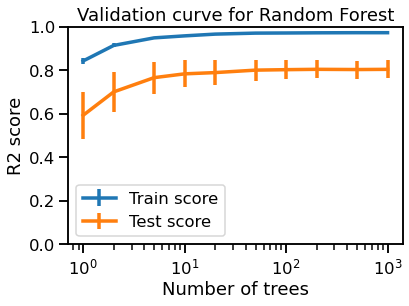

In [10]:
import matplotlib.pyplot as plt

plt.errorbar(
    n_estimators,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label='Train score',
)
plt.errorbar(
    n_estimators,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label='Test score',
)
plt.legend()
plt.xscale('log')
plt.xlabel('Number of trees')
plt.ylabel('R2 score')
plt.ylim([0, 1])
_ = plt.title('Validation curve for Random Forest')

Repeat the previous experiment but this time, instead of choosing the default parameters for the random forest, set the parameter max_depth=5 and build the validation curve.

In [11]:
rf = RandomForestRegressor(max_depth=5, random_state=0)
n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
train_scores_max_depth_5, test_scores_max_depth_5 = validation_curve(
    rf, data, target, 
    param_name='n_estimators', param_range=n_estimators,
    cv=cv, n_jobs=2
)

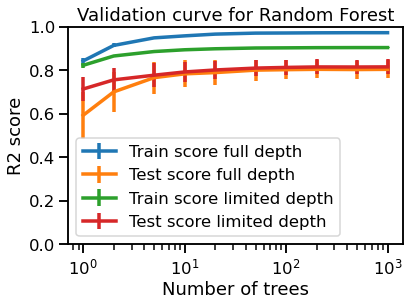

In [12]:
plt.errorbar(
    n_estimators,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label='Train score full depth',
)
plt.errorbar(
    n_estimators,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label='Test score full depth',
)
plt.errorbar(
    n_estimators,
    train_scores_max_depth_5.mean(axis=1),
    yerr=train_scores_max_depth_5.std(axis=1),
    label='Train score limited depth',
)
plt.errorbar(
    n_estimators,
    test_scores_max_depth_5.mean(axis=1),
    yerr=test_scores_max_depth_5.std(axis=1),
    label='Test score limited depth',
)

plt.legend()
plt.xscale('log')
plt.xlabel('Number of trees')
plt.ylabel('R2 score')
plt.ylim([0, 1])
_ = plt.title('Validation curve for Random Forest')

We see that decreasing the depth reduces the gap between the train and test scores. We also see that the random forest with limited depth has a better generalization performance for a small number of trees but becomes equivalent for higher numbers of trees. We can conclude that the random forest models with a limited depth overfit less than the random forest with fully grown trees, especially when the number of trees in the ensemble is small.

One can also observe that the limiting the depth has a significant effect on limiting the training score (ability to memorize exactly the training data) and that this effect remains important, even when increasing the size of the ensemble.

Random Forests are typically trained with at least 10 trees and typically much more than that.

Build a validation curve for a sklearn.ensemble.HistGradientBoostingRegressor varying max_iter.

In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor


hist_gbr = HistGradientBoostingRegressor(random_state=0)
max_iter = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

train_scores_hist_gbr, test_scores_hist_gbr = validation_curve(
    hist_gbr, data, target, 
    param_name='max_iter', param_range=max_iter,
    cv=cv, n_jobs=2
)

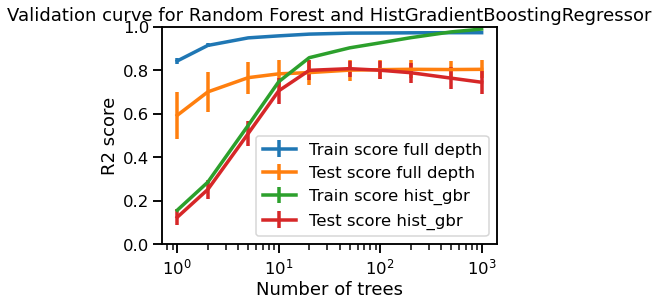

In [14]:
plt.errorbar(
    n_estimators,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label='Train score full depth',
)
plt.errorbar(
    n_estimators,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label='Test score full depth',
)
plt.errorbar(
    max_iter,
    train_scores_hist_gbr.mean(axis=1),
    yerr=train_scores_hist_gbr.std(axis=1),
    label='Train score hist_gbr',
)
plt.errorbar(
    max_iter,
    test_scores_hist_gbr.mean(axis=1),
    yerr=test_scores_hist_gbr.std(axis=1),
    label='Test score hist_gbr',
)

plt.rcParams["figure.figsize"] = (16,9)
plt.legend()
plt.xscale('log')
plt.xlabel('Number of trees')
plt.ylabel('R2 score')
plt.ylim([0, 1])
plt.title('Validation curve for Random Forest and HistGradientBoostingRegressor');

In the figure, we can clearly observe the three phase behavior "underfitting / best generalization / overfitting" of gradient boosting models. Indeed, with a low number of trees, the model has a low score for both the train and test scores. We can clearly see that the test scores are bound above by the train score, which is characteristic of underfitting models (contrary to what we previously observed on the learning curve of the RF models).
Both scores then improve until a sweet spot (~50 trees) where the test score is maximum. After this, the gradient boosting algorithm starts to overfit: the train score improves towards reaching a perfect score of 1 while the test score reduces. Indeed, the model starts to memorize specific rules only true on the training set. These rules become detrimental on the generalization performance of the model.

Here, it shows the importance of not adding too many trees to our gradient boosting ensemble. Indeed, one can use early-stopping and monitor the performance on an internal validation set to stop adding new trees when the validation score stops improving.

In [15]:
hgbdt = HistGradientBoostingRegressor(early_stopping=True, random_state=0)

cv_results_hgbdt = cross_validate(
    hgbdt, data, target, cv=cv, return_train_score=True, return_estimator=True
)

cv_results_hgbdt['train_score'].mean(), cv_results_hgbdt['train_score'].std()

(0.8802093174685013, 0.009772033922083758)

In [16]:
cv_results_hgbdt['test_score'].mean(), cv_results_hgbdt['test_score'].std()

(0.8075456252855009, 0.030400979794505564)

In [17]:
for idx, est in enumerate(cv_results_hgbdt["estimator"]):
    print(
        f"For CV iteration {idx + 1}, {est.n_iter_} trees were built"
    )

For CV iteration 1, 60 trees were built
For CV iteration 2, 50 trees were built
For CV iteration 3, 46 trees were built
For CV iteration 4, 29 trees were built
For CV iteration 5, 33 trees were built
For CV iteration 6, 33 trees were built
For CV iteration 7, 36 trees were built
For CV iteration 8, 31 trees were built
For CV iteration 9, 24 trees were built
For CV iteration 10, 23 trees were built


We therefore see that we never used more than 60 trees, before entering the overfitting zone we observed on the validation curve.

Even if this model is not stronger than a large random forest, it is smaller which means that it can be much faster to predict and will use fewer memory (RAM) on the machines where it is deployed. This is a practical advantage of Gradient Boosted Trees with early stopping over Random Forests with a large number of deep trees.